### Running shell commands from inside the notebook
To forward a command to the underlying shell of the computer prefix it with '!'.

In [1]:
#Windows, Mac OS and Linux, Google Colab -> Ausrufezeichen für den Shellbefehl
! echo Hello world

Hello world


In case that you are missing some packages they can easily be installed in the virtual environment you created from inside the notebook.  
You just need to follow these steps.  
1. source/activate the environment
    * Windows: `C:\Users\<USER>\ml_env\Scripts\activate`
    * Mac/Linux: `. /home/<USER>/workspaces/ml_env/bin/activate`
2. run your desired command e.g. `python -m pip install <PACKAGE_NAME>`
    
Let's try to upgrade pip - the Python package manager. Uncomment the respective line depending on your host system and run the command below.

In [ ]:
# Windows
#! C:\Users\<USER>\ml_env\Scripts\activate && python -m pip install --upgrade pip
# Mac OS and Linux
! . /home/<USER>/workspaces/ml_env/bin/activate && python -m pip install --upgrade pip
# Google Colab
#! python -m pip install --upgrade pip

# TensorFlow (TF 2.x) Tutorial 

In [2]:
from IPython.display import clear_output, Image, HTML, display

Image(url= "https://i.imgur.com/4nk5b4c.jpg", width=700) # from Google

TensorFlow programs work by building a graph of tensor objects that details how tensors are related. Running different parts of the graph allow results to be generated.

TensorFlow is a Library for:
* Defining computation graphs
* Calculating gradients



In this Semseter we will use Tensorflow to implement different machine learning algorithms 

* **Feed Forward Neural Networks (FFNNs)** classification and regression based on features.
* **Convolutional Neural Networks (CNNs)** image classification, object detection, video action recognition, etc.
* **Generative Adversarial Networks (GANs)**  unsupervised generation of realistic images, etc.
* **Deep Reinforcement Learning** game playing, robotics in simulation, self-play, neural architecture search, etc.

## Installing TensorFlow
To install TensorFlow on your local machine you can use pip - the python package manager.
```console
!python3 -m pip install tensorflow
```

## Importing TensorFlow
The first step is going to be to import TensorFlow.

In [3]:
import tensorflow as tf
if(int(tf.__version__[0]) <= 1):
    print('tensorflow {} detected; Please install tensorflow >= 2.0.0'.format(tf.__version__))
else:
    print('tensorflow {} detected'.format(tf.__version__))

tensorflow 2.1.0 detected


The next step is to import all required packages for this notebook.

In [4]:
import numpy as np
import pathlib
import shutil
import tempfile
from matplotlib import pyplot as plt

In [8]:
# Install some functions from tensorflow_docs - requires GIT to be installed
# Windows
#! C:\Users\<USER>\ml_env\Scripts\activate && python -m pip install git+https://github.com/tensorflow/docs
# Mac OS and Linux
! python -m pip install git+https://github.com/tensorflow/docs
# Google Colab
#! python -m pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /private/var/folders/h3/g6q8cj111r3ggnj87pb0s9zh0000gn/T/pip-req-build-fmnahp51
  Running command git clone -q https://github.com/tensorflow/docs /private/var/folders/h3/g6q8cj111r3ggnj87pb0s9zh0000gn/T/pip-req-build-fmnahp51
  Using cached https://files.pythonhosted.org/packages/c3/88/97eef84f48fa04fbd6750e62dcceafba6c63c81b7ac1420856c8dcc0a3f9/astor-0.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1a/53/9243c600e047bd4c3df9e69cfabc1e8004a82cac2e0c484580a78a94ba2a/absl-py-0.9.0.tar.gz
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.09547837b8b2237f3e12bdcfb7672a69127e76e2f_-cp37-none-any.whl size=100448 sha256=cb561f85b87dd7e87e98843aca68f6690d8dba0ac83d2b2068e5170a4011b255
  Stored in directory: /private/var/folders/h3/g6q8cj111r3ggnj87pb0s9zh0000gn/T/pip-ephem-wheel-cache-dd6qk6la/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
  Created wheel for absl-py: filename=a

In [17]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots


## Tensors
TensorFlow does have its own data structure for the purpose of performance and ease of use. Tensor is the data structure used in Tensorflow. You can think of a TensorFlow tensor as an n-dimensional array or list.

**Example**: The shape of a tensor can be described with a vector $[ 10000, 256, 256, 3 ]$
* 10,000 images
* Each image has 256 rows
* Each row has 256 pixels
* Each pixel has 3 channels (RGB)

Each tensor has a data type and a shape:  
* **Data Types Include**: float32, int32, string and others.
* **Shape**: Represents the dimension of data.

Just like vectors and matrices tensors can have operations applied to them like addition, subtraction, dot product, cross product etc.

In [18]:
# Creating Tensors
tensor1 = tf.Variable(300, tf.int16)
tensor2 = tf.Variable(2.123, tf.float64)
tensor3 = tf.Variable("Hello World", tf.string)

### Rank and Shape of Tensors
Rank means the number of dimensions involved in the tensor. 

In [19]:
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


In [20]:
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


In [21]:
rank_2_tensor = tf.constant([[2, 2],
                             [3, 3],
                             [4, 4]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[2. 2.]
 [3. 3.]
 [4. 4.]], shape=(3, 2), dtype=float16)


**To determine the rank** of a tensor we can call the following method.

In [22]:
tf.rank(rank_2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

The shape of a tensor is simply the number of elements that exist in each dimension.

In [23]:
rank_2_tensor.shape

TensorShape([3, 2])

## Computaional Graph
The backbone of any Tensorflow program is a Graph. Anything that happens in your model is represented by the computational graph.

* The edges correspond to multidimensional arrays (Tensors).
* The nodes create or manipulate these Tensors according to specific rules (Operations)
  * Operations on tensors (like math operations)
  * Generating tensors (like variables and constants).

In [24]:
Image(url= "https://i.imgur.com/2Ys4yTu.jpg", width=650)

## Machine Lerarning Model with TensorFlow
The basic structure of training a machine learning model is as follows.

1. Import the dataset.
2. Select the type of model.
3. Train the model.
4. Evaluate the model's effectiveness.
5. Use the trained model to make predictions.

A regression model can be used to predict the output of a continuous value, like a stock price or a time series. In contrast to a classification model, where the prediction is a discrete label, e.g. whether a picture contains a dog or a cat.

### Dataset
We want to create a model that converts temperatures measured in degree Fahrenheit to degree Celsius.
$$C = (F − 32) × 5/9$$

In [14]:
fahrenheit=np.array([-140,-136,-124,-112,-105,-96,-88,-75,-63,-60,-58,-40,-20,-10,0,30,35,48,55,69,81,89,95,99,105,110,120,135,145,158,160],dtype=float)
celsius=np.array([-95.55,-93.33,-86.66,-80,-76.11,-71.11,-66.66,-59.44,-52.77,-51.11,-50,-40,-28.88,-23.33,-17.77,-1.11,1.66,8.88,12,20,27.22,31.66,35,37.22,40.55,43.33,48.88,57.22,62.77,70,71.11],dtype=float)

### Create the Model
Here, We’ve designed the simplest  Regression model where it is a series of connected layers of things called neurons. We’ll use a Sequential model with two densely connected hidden layers, and an output layer that returns a single, continuous value.

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[1]),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
  ])

### Compile Model
A typical loss function for linear regression is the Mean Square Error (MSE). It gives an idea of how much error the system typically makes in its predictions, with a higher weight for larger errors.

In [25]:
learning_rate = 0.001

optimizer = tf.keras.optimizers.RMSprop(learning_rate)

model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error', 'mean_squared_error'])

### Model Summary

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


### Train Model
Now we are going to feed Fahrenheit and Celsius to train our model.

In [27]:
hist = {}
hist["model"] = model.fit(fahrenheit,celsius,epochs=150,validation_split=0.2)

Train on 24 samples, validate on 7 samples
Epoch 1/150
24/24 [==============================] - 1s 36ms/sample - loss: 2080.8066 - mean_absolute_error: 36.3595 - mean_squared_error: 2080.8066 - val_loss: 315.5255 - val_mean_absolute_error: 16.9289 - val_mean_squared_error: 315.5255
Epoch 2/150
24/24 [==============================] - 0s 637us/sample - loss: 1764.4291 - mean_absolute_error: 33.1904 - mean_squared_error: 1764.4291 - val_loss: 243.3219 - val_mean_absolute_error: 14.7616 - val_mean_squared_error: 243.3219
Epoch 3/150
24/24 [==============================] - 0s 703us/sample - loss: 1564.7617 - mean_absolute_error: 31.3990 - mean_squared_error: 1564.7617 - val_loss: 227.4088 - val_mean_absolute_error: 14.2413 - val_mean_squared_error: 227.4088
Epoch 4/150
24/24 [==============================] - 0s 417us/sample - loss: 1406.1740 - mean_absolute_error: 29.9353 - mean_squared_error: 1406.1740 - val_loss: 221.8667 - val_mean_absolute_error: 14.0561 - val_mean_squared_error: 221

### Plot the training and validation losses
The solid lines show the training loss, and the dashed lines show the validation loss (remember: a lower validation loss indicates a better model).



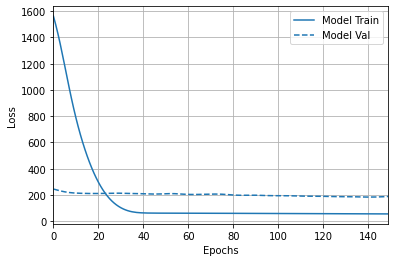

In [28]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)
plotter.plot(hist)

### Make Prediction (Inference)

In [29]:
model.predict([200])

array([[63.299713]], dtype=float32)

## Overfit and underfit
Learning how to deal with overfitting is important. Although it is often possible to achieve high accuracy on the training set, what we really want is to develop models that generalize well to a testing set (or data they haven't seen before).

The opposite of overfitting is underfitting. **Underfitting** occurs when there is still room for improvement on the test data. This can happen for a number of reasons: 
* If the model is not powerful enough,
* is over-regularized, or 
* has simply not been trained long enough. 

This means the model has not learned the relevant patterns in the training data.

If you train for too long though, the model will start to overfit and learn patterns from the training data that don't generalize to the test data. We need to strike a balance. Understanding how to train for an appropriate number of epochs as we'll explore below is a useful skill.

To prevent overfitting, the best solution is to use more complete training data. The dataset should cover the full range of inputs that the model is expected to handle. Additional data may only be useful if it covers new and interesting cases.

## Dataset
We will use for this example the Higgs dataset. It contains 11,000,000 examples, each with 28 features, and a binary class label. To keep this tutorial relatively short we use just the first 1,000 samples for validation, and the next 10,000 for training:

In [31]:
import pandas as pd
df = pd.read_csv('HIGGS_small.csv')
df.head()

0         1         2         3         4         5         6         7  \
0  1.0  0.869293 -0.635082  0.225690  0.327470 -0.689993  0.754202 -0.248573   
1  1.0  0.907542  0.329147  0.359412  1.497970 -0.313010  1.095531 -0.557525   
2  1.0  0.798835  1.470639 -1.635975  0.453773  0.425629  1.104875  1.282322   
3  0.0  1.344385 -0.876626  0.935913  1.992050  0.882454  1.786066 -1.646778   
4  1.0  1.105009  0.321356  1.522401  0.882808 -1.205349  0.681466 -1.070464   

          8         9  ...        19        20        21        22        23  \
0 -1.092064  0.000000  ... -0.010455 -0.045767  3.101961  1.353760  0.979563   
1 -1.588230  2.173076  ... -1.138930 -0.000819  0.000000  0.302220  0.833048   
2  1.381664  0.000000  ...  1.128848  0.900461  0.000000  0.909753  1.108330   
3 -0.942383  0.000000  ... -0.678379 -1.360356  0.000000  0.946652  1.028704   
4 -0.921871  0.000000  ... -0.373566  0.113041  0.000000  0.755856  1.361057   

         24        25        26        27        28  
0  0.978076  0.920005  0.721657  0.988751  0.876678  
1  0.985700  0.978098  0.779732  0.992356  0.798343  
2  0.985692  0.951331  0.803252  0.865924  0.780118  
3  0.998656  0.728281  0.869200  1.026736  0.957904  
4  0.986610  0.838085  1.133295  0.872245  0.808487  

[5 rows x 29 columns]

In [ ]:
#Das NN hat 28 inputs auf 2 Outputs

In [33]:
import tensorflow as tf
# Applay to each row in the dataset this function is good part to 
# add some noise to the data or to make image processing
def pack_row(*row):
  label = row[0]
  features = tf.stack(row[1:],1)
  return features, label

def load_train_validate_ds(N_TRAIN,N_VALIDATION,BATCH_SIZE):
  # The Higgs dataset contains 11 000 000 examples, each with 28 features, and a binary class label
  # To use the big data set then you can run the command:
  #gz = tf.keras.utils.get_file('HIGGS.csv.gz', 'http://mlphysics.ics.uci.edu/data/higgs/HIGGS.csv.gz')
  # To use a small record, you must upload it from the exercise folder
  #gz = tf.keras.utils.get_file('HIGGS.csv.gz', 'HIGGS_small.csv.gz')
  # The tf.data.experimental.CsvDataset class can be used to read csv records directly from a gzip 
  # file with no intermediate decompression step
  FEATURES = 28
  ds = tf.data.experimental.CsvDataset('HIGGS_small.csv',[float(),]*(FEATURES+1),header=False)
  # So instead of repacking each row individually make a new Dataset that takes batches 
  # of 10000-examples, applies the pack_row function to each batch, and then splits the
  # batches back up into individual records:
  packed_ds = ds.batch(10000).map(pack_row).unbatch()  
  BUFFER_SIZE = int(1e4)
  STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE
  validate_ds = packed_ds.take(N_VALIDATION).cache()
  train_ds = packed_ds.skip(N_VALIDATION).take(N_TRAIN).cache()
  # These datasets return individual examples. Use the .batch method to create batches of
  # an appropriate size for training. Before batching also remember to .shuffle and 
  #.repeat the training set.
  validate_ds = validate_ds.batch(BATCH_SIZE)
  train_ds = train_ds.shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE)
  return train_ds, validate_ds

To see more information on this topic: Dataset with TensorFlow you can see the following videos:
* https://www.youtube.com/watch?v=oFFbKogYdfc
* https://www.youtube.com/watch?v=TOP2aLxcuu8


In [34]:
# To keep this tutorial relatively short use just the first 5000 samples for validation,
# and the next 5 00 for training:
n_train      = int(5000) # The number of samples in training data
n_validation = int(500)
batch_size   = 250
train_ds, validate_ds =  load_train_validate_ds(n_train,n_validation,batch_size)

In [35]:
for features,label in train_ds.take(1):
  print(label)
  print(features[0])

tf.Tensor(
[0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.], shape=(250,), dtype=float32)
tf.Tensor(
[ 1.7429786   0.7499018  -1.4012685   0.21227357  0.763278    1.4718531
 -1.2090961   1.2502773   0.          1.874703    0.43232155 -0.12171089
  1.1074361   1.1448755   0.27779874 -0.5

In [36]:
# Training Parameters
FEATURES = 28
STEPS_PER_EPOCH = n_train//batch_size
print("The number of steps per epoch: ", STEPS_PER_EPOCH)

The number of steps per epoch:  20


### Demonstrate overfitting
The simplest way to prevent overfitting is to start with a small model: A model with a small number of learnable parameters (which is determined by the number of layers and the number of units per layer). In deep learning, the number of learnable parameters in a model is often referred to as the model's "capacity".

Intuitively, a model with more parameters will have more "memorization capacity" and therefore will be able to easily learn a perfect dictionary-like mapping between training samples and their targets, a mapping without any generalization power, but this would be useless when making predictions on previously unseen data.

Always keep this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

On the other hand, if the network has limited memorization resources, it will not be able to learn the mapping as easily. To minimize its loss, it will have to learn compressed representations that have more predictive power. At the same time, if you make your model too small, it will have difficulty fitting to the training data. There is a balance between "too much capacity" and "not enough capacity".

To find an appropriate model size, it's best to start with relatively few layers and parameters, then begin increasing the size of the layers or adding new layers until you see diminishing returns on the validation loss.

Start with a simple model using only `layers.Dense` as a baseline, then create larger versions, and compare them.




## Training procedure
Many models train better if you gradually reduce the learning rate during training. Use optimizers.schedules to reduce the learning rate over time:

In [37]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

The code above sets a `schedules.InverseTimeDecay` to hyperbolically decrease the learning rate to 1/2 of the base rate at 1000 epochs, 1/3 at 2000 epochs and so on.

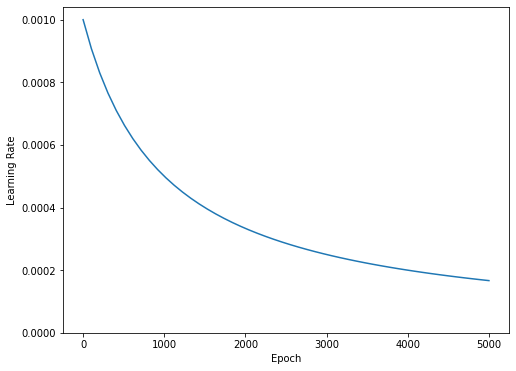

In [38]:
step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

For this tutorial, choose the ADAM optimizer

In [39]:
# Define the Optimizer
def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

The training for this tutorial runs for many short epochs. To reduce the logging noise use the `tfdocs.EpochDots` which simply prints a `.` for each epoch, and a full set of metrics every 100 epochs.

Next include `callbacks.EarlyStopping` to avoid long and unnecessary training times. Note that this callback is set to monitor the `val_binary_crossentropy`, not the `val_loss`. This difference will be important later.

Use `callbacks.TensorBoard` to generate TensorBoard logs for the training.

In [40]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

In [41]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
# delete all the contents of a directory 
shutil.rmtree(logdir, ignore_errors=True) 

Similarly each model will use the same `Model.compile` and `Model.fit` settings. Choose the binary cross entropy loss function. To read more about this loss https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

In [49]:
def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
  if optimizer is None:
    optimizer = get_optimizer()
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])
#BinaryCross ist als loss function geeignet im vergleich zu MSE, weil wir classifizierung in zwei klassen machen
  model.summary()

  history = model.fit(
    train_ds,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=max_epochs,
    validation_data=validate_ds,
    callbacks=get_callbacks(name),
    verbose=0)
  return history

## Tiny model
Start by training a model:

In [50]:
tiny_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    tf.keras.layers.Dense(1)
])

In [51]:
size_histories = {}

In [52]:
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny', max_epochs= 400)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                464       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4958,  binary_crossentropy:0.8692,  loss:0.8692,  val_accuracy:0.4820,  val_binary_crossentropy:0.7821,  val_loss:0.7821,  
....................................................................................................
Epoch: 100, accuracy:0.5904,  binary_crossentropy:0.6303,  loss:0.6303,  val_accuracy:0.5880,  val_binary_crossentropy:0.6100,  val_loss:0.6100,  
....................................................................................................
Epoch: 200, accuracy:0.

Now check how the model did:

(0.5, 0.7)

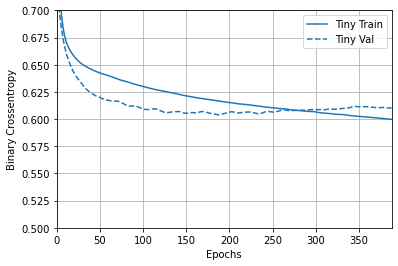

In [53]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
plotter.plot(size_histories)
plt.ylim([0.5, 0.7])

## Large model
As an exercise, you can create an even larger model, and see how quickly it begins overfitting. Next, let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

In [54]:
large_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='elu', input_shape=(FEATURES,)),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(1)
])

In [48]:
size_histories['large'] = compile_and_fit(large_model, "sizes/large", max_epochs= 400)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               7424      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 139,265
Trainable params: 139,265
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.5160,  binary_crossentropy:0.7153,  loss:0.7153,  val_accuracy:0.5620,  val_binary_crossentropy:0.6579,  val_loss:0.6579,  
....................................................................................................

### Plot the training and validation losses
The solid lines show the training loss, and the dashed lines show the validation loss (remember: a lower validation loss indicates a better model).

While building a larger model gives it more power, if this power is not constrained somehow it can easily overfit to the training set.

In this example, typically, only the "Tiny" model manages to avoid overfitting altogether, and the "large" model overfits the data more quickly. This becomes so severe for the "large" model that you need to switch the plot to a log-scale to really see what's happening.

This is apparent if you plot and compare the validation metrics to the training metrics.

* It's normal for there to be a small difference.
* If both metrics are moving in the same direction, everything is fine.
* If the validation metric begins to stagnate while the training metric continues to improve, you are probably close to overfitting.
* If the validation metric is going in the wrong direction, the model is clearly overfitting.

Text(0.5, 0, 'Epochs [Log Scale]')

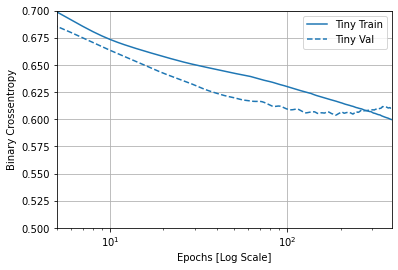

In [55]:
plotter.plot(size_histories)
a = plt.xscale('log')
plt.xlim([5, max(plt.xlim())])
plt.ylim([0.5, 0.7])
plt.xlabel("Epochs [Log Scale]")

### View in TensorBoard

These models all wrote TensorBoard logs during training.

Open an embedded  TensorBoard viewer inside a notebook:

In [58]:
 %load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [59]:
#docs_infra: no_execute
%tensorboard --logdir {logdir}/sizes

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

## Strategies to prevent overfitting#
Before getting into the content of this section copy the training logs from the "Tiny" model above, to use as a baseline for comparison.

In [60]:
shutil.rmtree(logdir/'regularizers/Tiny', ignore_errors=True)
shutil.copytree(logdir/'sizes/Tiny', logdir/'regularizers/Tiny')

PosixPath('/var/folders/h3/g6q8cj111r3ggnj87pb0s9zh0000gn/T/tmp12f6ex6x/tensorboard_logs/regularizers/Tiny')

In [61]:
regularizer_histories = {}
regularizer_histories['Tiny'] = size_histories['Tiny']

### Add weight regularization

You may be familiar with Occam's Razor principle: given two explanations for something, the explanation most likely to be correct is the "simplest" one, the one that makes the least amount of assumptions. This also applies to the models learned by neural networks: given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.

A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:

* [L1 regularization](https://developers.google.com/machine-learning/glossary/#L1_regularization), where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

* [L2 regularization](https://developers.google.com/machine-learning/glossary/#L2_regularization), where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

L1 regularization pushes weights towards exactly zero encouraging a sparse model. L2 regularization will penalize the weights parameters without making them sparse since the penalty goes to zero for small weights. one reason why L2 is more common.

In `tf.keras`, weight regularization is added by passing weight regularizer instances to layers as keyword arguments. Let's add L2 weight regularization now.

In [62]:
from tensorflow.keras import regularizers

In [63]:
l2_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    tf.keras.layers.Dense(256, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(256, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(1)
])

regularizer_histories['l2'] = compile_and_fit(l2_model, "regularizers/l2", max_epochs= 400)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               7424      
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 257       
Total params: 139,265
Trainable params: 139,265
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4892,  binary_crossentropy:0.7374,  loss:1.2809,  val_accuracy:0.5260,  val_binary_crossentropy:0.6508,  val_loss:1.1721,  
....................................................................................................

### Add dropout
Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto.

The intuitive explanation for dropout is that because individual nodes in the network cannot rely on the output of the others, each node must output features that are useful on their own.

Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1].

The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In `tf.keras`,  you can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before.

Let's add two Dropout layers in our network to see how well they do at reducing overfitting:

In [64]:
dropout_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='elu', input_shape=(FEATURES,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

regularizer_histories['dropout'] = compile_and_fit(dropout_model, "regularizers/dropout", max_epochs= 400)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               7424      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                

Plot the results 

(0.5, 0.7)

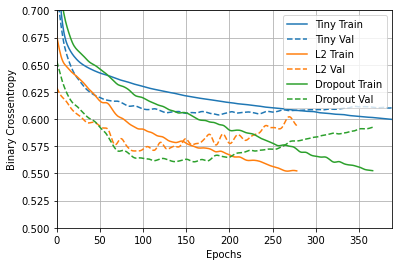

In [65]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

In [ ]:
%tensorboard --logdir {logdir}/regularizers

## References
* https://androidkt.com/split-the-data-into-train-test-dev/
* https://www.tensorflow.org/tutorials/keras/overfit_and_underfit
* https://www.tensorflow.org/guide/tensor